<a href="https://colab.research.google.com/github/Prabhu-04/ML-Algorithms-from-Scratch/blob/master/KNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import NamedTuple
from typing import List
from collections import Counter
Vector= List[float]
import matplotlib.pyplot as plt

In [2]:
def raw_majority_vote(labels:List[str]):
  votes=Counter(labels)
  winner,_=votes.most_common(1)[0]
  return winner

  #this method does'nt perform great with multiple winners

In [3]:
print(raw_majority_vote(['a','a','b','b','c','d']))

a


In [4]:
def majority_vote(labels):
  vote_counts=Counter(labels)
  winner,winner_count=vote_counts.most_common(1)[0]
  num_winners=len([count for count in vote_counts.values() if count==winner_count])
  if num_winners==1:
    return winner #return the unique winner
  else: return majority_vote(labels[:-1])#rerun-without the farthest neighbor
#This approach might work well since the worst-case goes all the way down to just one label


In [5]:
print(majority_vote(['a','a','b','b','c','d']))

a


In [6]:
#subtracting two vectors:
def vector_subtract(labeled_point,new_point):
  return [labeled_p-new_p for labeled_p,new_p in zip(labeled_point,new_point)]
  

In [7]:
#dot product
def dot(labeled_point,new_point):
  return sum(labeled_p*new_p for labeled_p,new_p in zip(labeled_point,new_point))

In [8]:
#sum of squares
def sum_of_squares(point):
  return dot(point,point)

In [9]:
import math
#magnitude of the vectors
def magnitude(point):
  return math.sqrt(sum_of_squares(point))

In [10]:
#calculating distance between labeled point and new point
def distance(labeled_point,new_point):
  return magnitude(vector_subtract(labeled_point,new_point))

In [11]:
class LabeledPoint(NamedTuple):
  point: Vector
  label: str 

In [28]:
def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],new_point:Vector) -> str:
#labeled points will be a list or tuple or dictionary with (labels,points)
  by_distance=sorted(labeled_points,
                     key=lambda lp: distance(lp[0], new_point))
#ordering the points from nearest to farthest
  k_nearest_labels=[lp for _,lp in by_distance[:k]]
#finding k-closest labels
  return majority_vote(k_nearest_labels)

In [13]:
#sample data based on programming language preferred by developers in USA depending on their latitude and longitude
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]

In [16]:
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [14]:
#Languages are the keys and (longitude,latitude) is the value pairs
plots={'Java':([],[]),'Python':([],[]),'R':([],[])}
markers={'Java':'o','Python':'s','R':'^'}
colors={'Java':'b','Python':'r','R':'g'}

In [18]:
for (longitude,lattitude),language in cities:
  plots[language][0].append(longitude)
  plots[language][1].append(lattitude)

ValueError: ignored

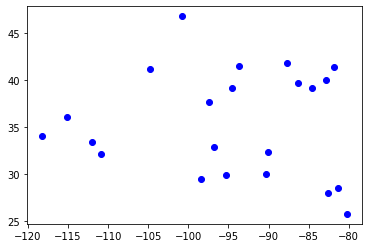

In [23]:
for language,(x,y) in plots.items():
  plt.scatter(x,y,color=colors[language],marker=markers[language],label=language,zorder=10)
plt.legend(loc=0)          # let matplotlib choose the location
plt.axis([-130,-60,20,55]) # set the axes
plt.title("Favorite Programming Languages")
plt.show()

In [30]:
for k in [2,3,4,5,6]:
  correct_predictions=0
  for city in cities:
    location,actual_language=city
    other_cities=[other_city for other_city in cities if other_city!=city]
    predicted_language=knn_classify(k,other_cities,location)
    if predicted_language==actual_language:
      correct_predictions+=1
  print(k,'neighbor[s]:',correct_predictions,'correct out of',len(cities))

2 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
4 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
6 neighbor[s]: 33 correct out of 75
